In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')


In [2]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.mean()

year               2013.090783
selling_price    504127.311751
km_driven         66215.777419
dtype: float64

In [8]:
df.var()

year             1.776912e+01
selling_price    3.347186e+11
km_driven        2.175672e+09
dtype: float64

In [9]:
df.skew()

year            -0.833240
selling_price    4.892021
km_driven        2.669057
dtype: float64

In [10]:
df.kurtosis()

year              0.668263
selling_price    37.087543
km_driven        23.316809
dtype: float64

In [11]:
df['Age']=2021-df['year']

In [12]:
df.drop('year',axis=1,inplace=True)

In [13]:
df.corr()

,selling_price,km_driven,Age
selling_price,1.000000,-0.192289,-0.413922
km_driven,-0.192289,1.000000,0.419688
Age,-0.413922,0.419688,1.000000


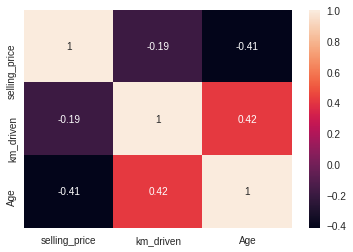

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Age'],
      dtype='object')

In [16]:
def convert(x):
  token=x.split()[0]
  return token
  

In [17]:
df['owner']=df['owner'].apply(convert)

In [18]:
df.drop(df[df['owner']=='Test'].index,inplace=True)

In [19]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second,7


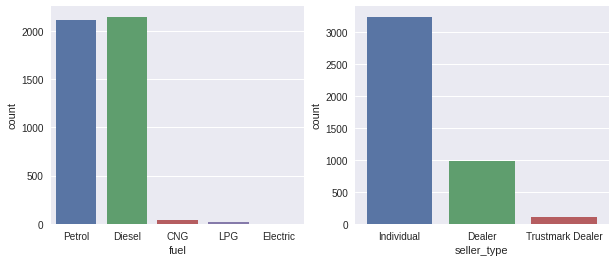

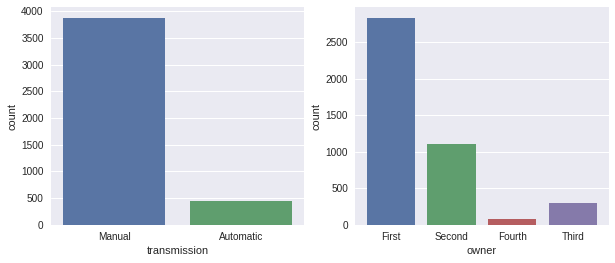

In [20]:
cat_index=['fuel','seller_type','transmission','owner']
i=0
while i<len(cat_index):
  fig=plt.figure(figsize=[10,4])
  plt.subplot(1,2,1)
  sns.countplot(x=cat_index[i],data=df)
  i+=1
  plt.subplot(1,2,2)
  sns.countplot(x=cat_index[i],data=df)
  i+=1
  plt.plot()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


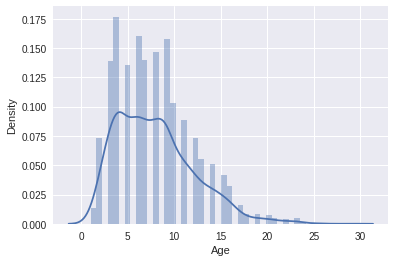

In [21]:
sns.distplot(df['Age'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


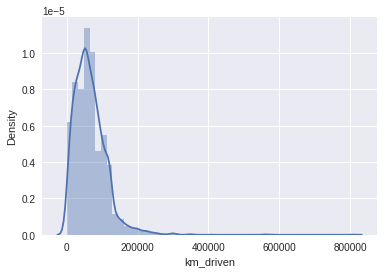

In [22]:
sns.distplot(df['km_driven'],kde=True)

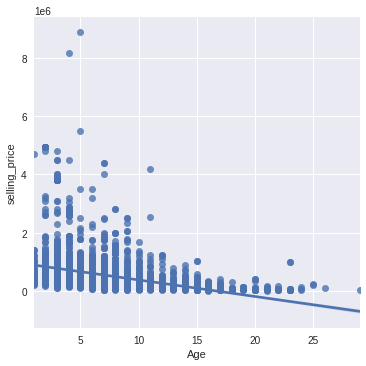

In [23]:
sns.lmplot(x='Age',y='selling_price',data=df)

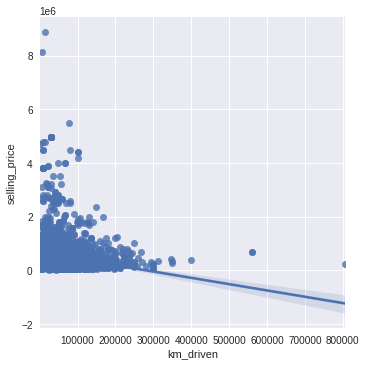

In [24]:
sns.lmplot(x='km_driven',y='selling_price',data=df)

In [26]:
df.drop('name',axis=1,inplace=True)

In [28]:
df = pd.get_dummies(data = df,drop_first=True)

In [29]:
df

,selling_price,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth,owner_Second,owner_Third
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,7,1,0,0,0,1,0,1,0,1,0
4336,409999,80000,7,1,0,0,0,1,0,1,0,1,0
4337,110000,83000,12,0,0,0,1,1,0,1,0,1,0
4338,865000,90000,5,1,0,0,0,1,0,1,0,0,0


In [30]:
y = df['selling_price']
X = df.drop('selling_price',axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3458, 12)
x test:  (865, 12)
y train:  (3458,)
y test:  (865,)


In [32]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [33]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.45
Test R2-score : 0.51
Train CV scores : [0.44532444 0.46827581 0.40952995 0.37471145 0.50245579]
Train CV mean : 0.44


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


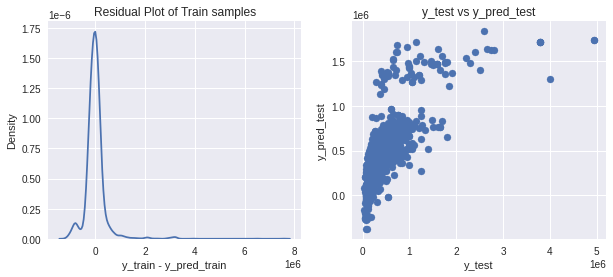

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,'123.pkl')

In [36]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.511676803678295